In [ ]:
# Copyright 2020 IITK EE604A Image Processing. All Rights Reserved.
# 
# Licensed under the MIT License. Use and/or modification of this code outside of EE604 must reference:
#
# © IITK EE604A Image Processing 
# https://github.com/ee604/ee604_assignments
#
# Author: Shashi Kant Gupta, Chiranjeev Prachand and Prof K. S. Venkatesh, Department of Electrical Engineering, IIT Kanpur







# Task 1: Image Enhancement I: Intensity Level

In this task, we will implement following two methods which was taught in class:
1. Gamma modification
2. Histogram equalization

In [8]:
%%bash
pip install git+https://github.com/ee604/ee604_plugins

  Cloning https://github.com/ee604/ee604_plugins to /tmp/pip-req-build-vi0bta64
  Created wheel for ee604-plugins: filename=ee604_plugins-0.2.2-cp36-none-any.whl size=2313 sha256=86d98426067a60fe2f006e11765ce9a3748468f250fe61380078261f647d798a
  Stored in directory: /tmp/pip-ephem-wheel-cache-180q82o3/wheels/34/a8/1d/ae3b7d209ecde89b4800a47ec55a61e7503bb9548bbb975806
Successfully built ee604-plugins


  Running command git clone -q https://github.com/ee604/ee604_plugins /tmp/pip-req-build-vi0bta64


In [9]:
# Importing required libraries

import cv2
import numpy as np
import matplotlib.pyplot as plt

from ee604_plugins import download_dataset, cv2_imshow
download_dataset(assignment_no=2, task_no=1) # download data for this assignment

Download Complete!


In [10]:
def gamma_modification(img, gamma=1):
    '''
    Write your program to apply gamma (power law) modification to input image.
    
    Inputs:
    + img - grayscaled image of size N x N
          - values between [0, 255] - 'uint8'
    + gamma - gamma (power law) parameter
    
    Ouputs:
    + out_img - gamma modified grayscaled image of size N x N
              - values between [0, 255] - 'uint8'
    
    Allowed modules:
    + Basic numpy operations
    
    Hint:
    + Not needed.
    
    '''
    
    #############################
    # Start your code from here #
    #############################
    
    img = img/256
    new_img = pow(img, gamma)
    out_img = np.array(256*new_img, dtype="uint8")

    
    #############################
    # End your code here ########
    #############################    
    
    return out_img

In [11]:
def histogram_equalization_global(img):
    '''
    Write your program to equalise the intesnity level of the given image using histogram equalization method.
    In this one you have to use the global statistics of the image.
    
    Inputs:
    + img - grayscaled image of size N x N
          - values between [0, 255] - 'uint8'
    
    Ouputs:
    + out_img - histogram equalized grayscaled image of size N x N
              - values between [0, 255] - 'uint8'
    
    Allowed modules:
    + You are allowed to use np.histogram or any relevant numpy module
    + You are not allowed t use cv2.equalizeHist or any other direct implementations
    
    Hint:
    + Not needed.
    
    '''
    
    #############################
    # Start your code from here #
    #############################
    
    m,n = img.shape

    hist, bins = np.histogram(img.flatten(), bins=256, range=[0,256])
    pmf = hist/np.sum(hist)

    cdf = pmf.cumsum()
    out_img = np.zeros(img.shape)

    for i in range(m):
      for j in range(n):
        out_img[i][j] = int(255*cdf[img[i][j]])
    
    
    #############################
    # End your code here ########
    #############################    
    
    return out_img

In [13]:
def histogram_equalization_local(img, kernel_size=15):
    '''
    Write your program to equalise the intesnity level of the given image using histogram equalization method.
    In this one you have to use the global statistics of the image.
    
    Inputs:
    + img - grayscaled image of size N x N
          - values between [0, 255] - 'uint8'
    + kernel_size - size of the kernel window which should be considered for
                  - the local statistics of the image
    
    Ouputs:
    + out_img - locally histogram equalized grayscaled image of size N x N
              - values between [0, 255] - 'uint8'
    
    Allowed modules:
    + You are allowed to use np.histogram or any relevant numpy module
    + You are not allowed t use cv2.equalizeHist or any other direct implementations
    
    Hint:
    + Loop across all the points (i, j) in the input image and take [k, k] size window centered at (i, j). 
      Apply histogram_equalization_global() on the cropped window. Note you need to adjust your code for borders
    + Above mentioned method is not an efficient method and tiling method can be used but that will be
      more complex as you need to interpolate to get the final image.
    + Instead you can use incremental update.
    + Wiki link: https://en.wikipedia.org/wiki/Adaptive_histogram_equalization
    + All three method will award you same marks.
    
    '''
    
    #############################
    # Start your code from here #
    #############################
    
    m,n = img.shape
    a = int(kernel_size/2)

    img = np.pad(img,((a,a),(a,a)), 'constant')
    pad_m, pad_n = img.shape
    out_img = np.zeros((pad_m,pad_n))

    for i in range(a, m+a):
      for j in range(a, n+a):
        window = img[i-a:i+a+1, j-a:j+a+1]
        output = histogram_equalization_global(window)
        out_img[i][j] = output[a][a]
        #img[i-a:i+a+1][j-a:j+a+1] = output
    
    out_img = out_img[a:m+a, a:n+a]

    #############################
    # End your code here ########
    #############################    
    
    return out_img

### Test

---

In [14]:
# Do not change codes inside this cell
# Add your observations in next to next cell
# Your observation should compare the different methods for different images

weeki_img = cv2.imread('data/gamma_modified_Weeki_Wachee_spring.jpg', 0)
hawkes_img = cv2.imread('data/Unequalized_Hawkes_Bay_NZ.jpg', 0)
tsukabi_l = cv2.imread('data/tsukuba_l.png', 0)

def plot_frame(gridx, gridy, subplot_id, img, name):
    plt.subplot(gridx, gridy, 1 + int(subplot_id))
    plt.imshow(np.uint8(img), cmap="gray", vmin=0, vmax=255)
    plt.axis("off")
    plt.title(name)


-------------------------
#   Weeki Wachee
-------------------------


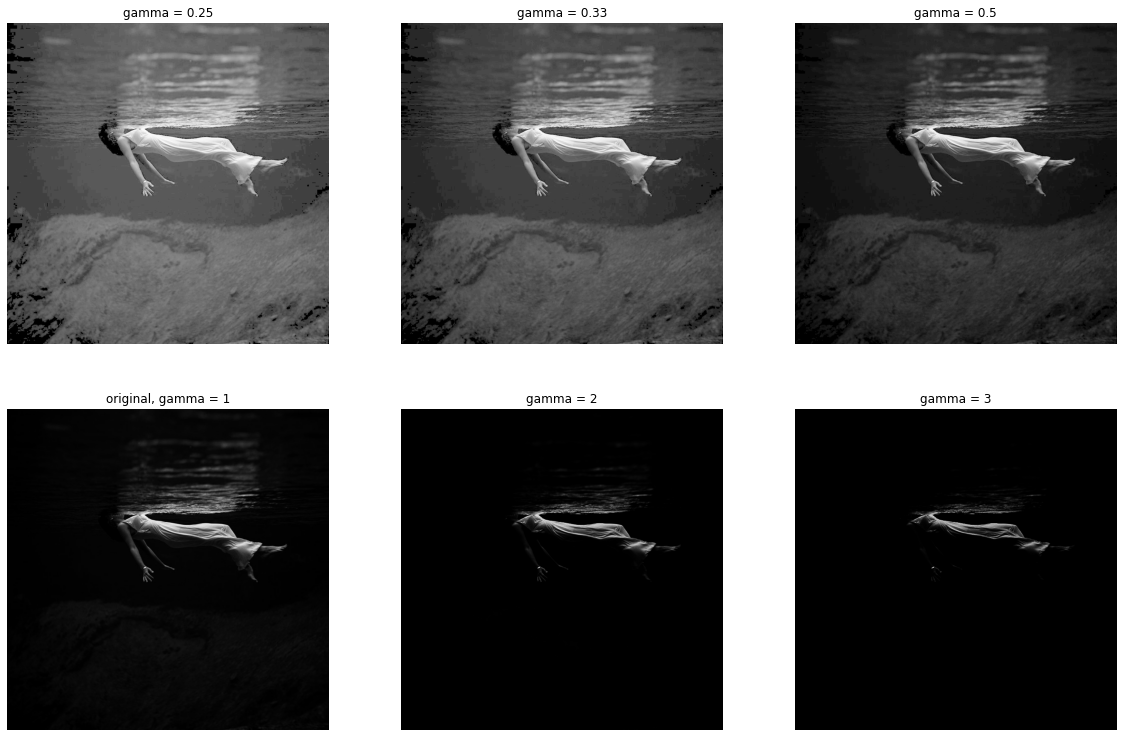


-------------------------
#   Hawkes Bay (NZ)
-------------------------


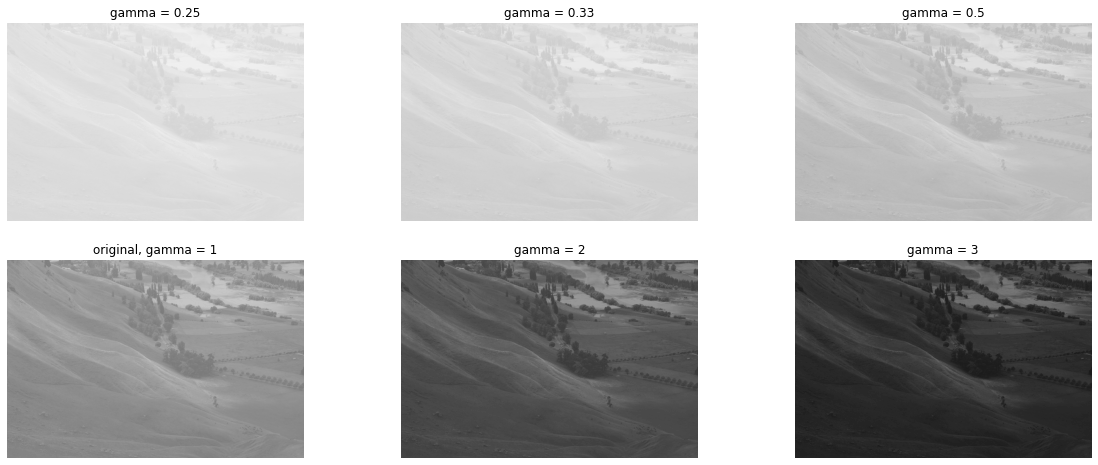

In [15]:
# Do not change codes inside this cell
# Add your observations in next cell

print("\n-------------------------")
print("#   Weeki Wachee")
print("-------------------------")
plt.figure(figsize=(20, 13))
np.seterr(divide='ignore', invalid='ignore')
count = 0
for i in [1/4, 1/3, 1/2, 1, 2, 3]:
    tmp_img = gamma_modification(np.copy(weeki_img), gamma=i)
    if i == 1:
        title = "original, gamma = 1"
    else:
        title = "gamma = " + str(round(i, 2))
        
    plot_frame(2, 3, count, tmp_img, title)
    count += 1
plt.show()

print("\n-------------------------")
print("#   Hawkes Bay (NZ)")
print("-------------------------")
plt.figure(figsize=(20, 8))
count = 0
for i in [1/4, 1/3, 1/2, 1, 2, 3]:
    tmp_img = gamma_modification(np.copy(hawkes_img), gamma=i)
    if i == 1:
        title = "original, gamma = 1"
    else:
        title = "gamma = " + str(round(i, 2))
        
    plot_frame(2, 3, count, tmp_img, title)
    count += 1
plt.show()


-------------------------
#    Tsukabi
-------------------------


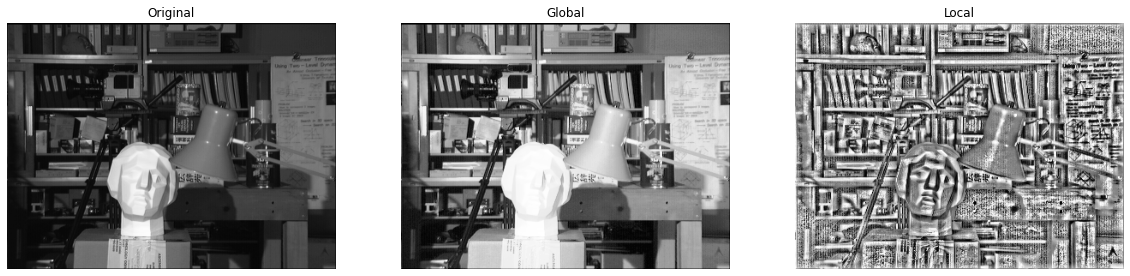


-------------------------
#    Hawkes Bay (NZ)
-------------------------


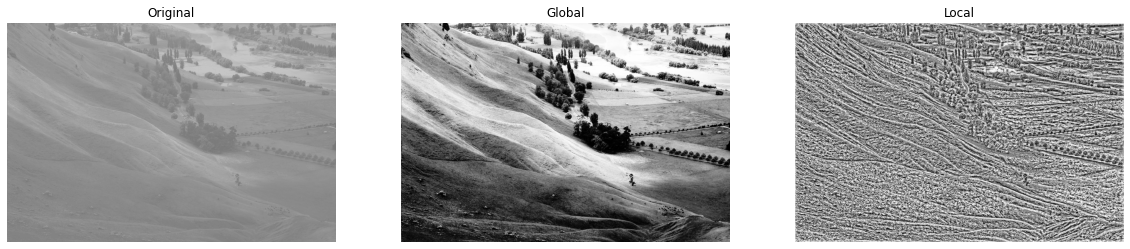


-------------------------
#    Weeki Wachee
-------------------------


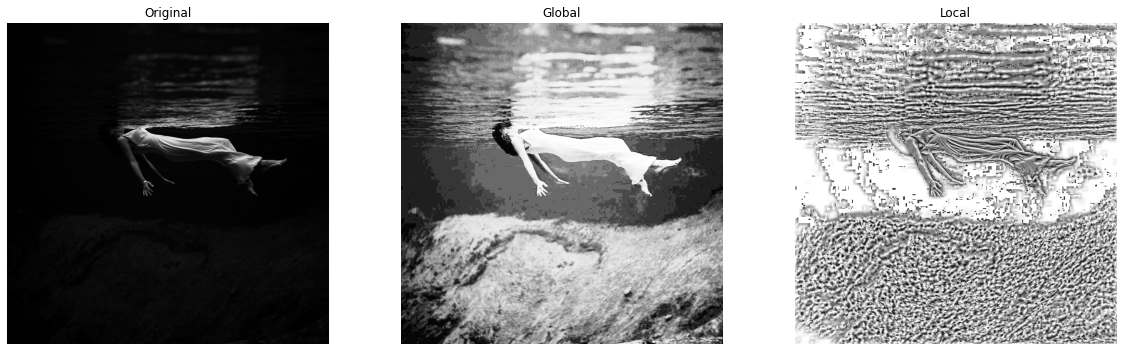

In [16]:
img_arr = [tsukabi_l, hawkes_img, weeki_img]
img_caption = ["Tsukabi", "Hawkes Bay (NZ)", "Weeki Wachee"]
for i in range(3):
    print("\n-------------------------")
    print("#   ", img_caption[i])
    print("-------------------------")
    
    plt.figure(figsize=(20, 13))
    plot_frame(2, 3, 0, img_arr[i], "Original")
    
    tmp_img = histogram_equalization_global(np.copy(img_arr[i]))
    plot_frame(2, 3, 1, tmp_img, "Global")
    
    tmp_img = histogram_equalization_local(np.copy(img_arr[i]))
    plot_frame(2, 3, 2, tmp_img, "Local")

    plt.show()

In [17]:
your_observation = """

For Gamma Modification: 
Lower gamma values make the image more white and Higher gamma values makes the image more black. It depends on the given image, which modification 
is best(low values or high). For given example of "Weeki Wachee", gamma=0.5 gives us more details of the original image, whereas, for given example of 
"Hawkes Bay (NZ)", gamma=3 provide us with more details of the original image.

For Histogram Equalization:
It again depends on the input image, for "Tsukabi" example Global Histogram Equalization simply increases the contrast of the given image, although it's 
not required in the image (to have finer details). For "Hawkes Bay (NZ)" example, Global Histogram Equalization gives us better details than Original. 
For "Weeki Wachee", Global just simply ruins the image. The Local Histogram Equalization in all the given examples just defines the edges of the image 
and ruins the original image, as in all the details except the edges is lost.

"""

print(your_observation)



For Gamma Modification: 
Lower gamma values make the image more white and Higher gamma values makes the image more black. It depends on the given image, which modification 
is best(low values or high). For given example of "Weeki Wachee", gamma=0.5 gives us more details of the original image, whereas, for given example of 
"Hawkes Bay (NZ)", gamma=3 provide us with more details of the original image.

For Histogram Equalization:
It again depends on the input image, for "Tsukabi" example Global Histogram Equalization simply increases the contrast of the given image, although it's 
not required in the image (to have finer details). For "Hawkes Bay (NZ)" example, Global Histogram Equalization gives us better details than Original. 
For "Weeki Wachee", Global just simply ruins the image. The Local Histogram Equalization in all the given examples just defines the edges of the image 
and ruins the original image, as in all the details except the edges is lost.




In [18]:
# Submission >>>>>>>>>>>>>>>>>>>>>
# Do not change codes inside this cell.

img_arr = [tsukabi_l, hawkes_img, weeki_img]
gen_imgs = []

for i in range(3):
    for gamma in [1/4, 1/3, 1/2, 1, 2, 3]:
        tmp_img = gamma_modification(np.copy(img_arr[i]), gamma=gamma)
        gen_imgs.append(tmp_img)
        
    tmp_img = histogram_equalization_global(np.copy(img_arr[i]))
    gen_imgs.append(tmp_img)

    tmp_img = histogram_equalization_local(np.copy(img_arr[i]))
    gen_imgs.append(tmp_img)

task1_submission = np.array(gen_imgs)